In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C,WhiteKernel

In [8]:
def f(x):
    """The function to predict."""
    return x* np.sin(x)

In [43]:
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
#X_= np.linspace(0, 5, 100)
# Observations
y = f(X).ravel()
#y_=f(X_).ravel()
x = np.linspace(0, 10, 1000)


# Instanciate a Gaussian Process model
kernel = ConstantKernel() * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

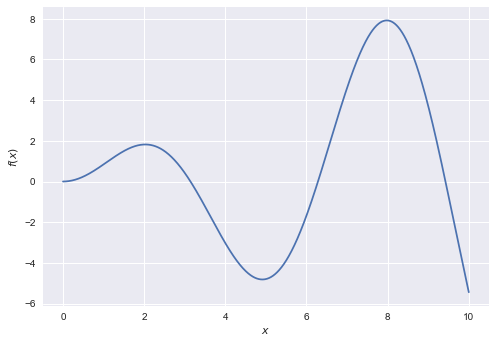

In [21]:
plt.plot(x,f(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

rng = np.random.RandomState(4)
X=rng.uniform(10,0, 7)

In [130]:
y_samples[:,0]

array([-1.73154734, -1.74055132, -1.74960367, -1.75870738, -1.76786375,
       -1.77707539, -1.78634298, -1.79566871, -1.80505367, -1.81449966,
       -1.82400731, -1.83357786, -1.84321239, -1.8529106 , -1.86267419,
       -1.87250322, -1.88239701, -1.89235713, -1.90238248, -1.91247337,
       -1.92262942, -1.93285001, -1.94313482, -1.95348227, -1.96389263,
       -1.97436411, -1.98489564, -1.99548631, -2.00613419, -2.01683828,
       -2.02759644, -2.03840686, -2.04926792, -2.06017737, -2.07113296,
       -2.08213263, -2.09317364, -2.10425374, -2.1153701 , -2.12652037,
       -2.13770109, -2.14890979, -2.16014337, -2.17139852, -2.18267216,
       -2.1939608 , -2.20526129, -2.21657003, -2.22788335, -2.2391979 ,
       -2.25050975, -2.26181533, -2.27311055, -2.28439152, -2.29565464,
       -2.30689517, -2.31810995, -2.32929403, -2.3404439 , -2.35155519,
       -2.36262332, -2.37364454, -2.38461393, -2.3955278 , -2.40638157,
       -2.41717072, -2.42789089, -2.4385377 , -2.44910644, -2.45

C:\Users\karvo\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


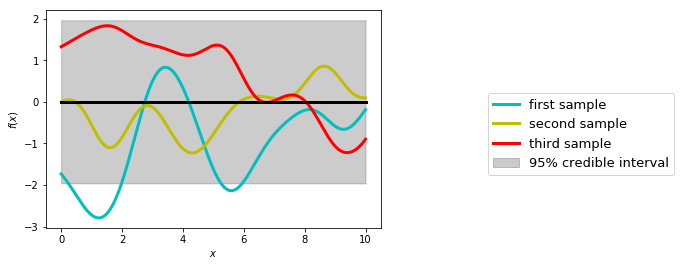

In [6]:
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)
#s=gp.sample_y(X.reshape(-1,1),1)
y_samples = gp.sample_y(x[:, np.newaxis], 3)
plt.plot(x,y_mean, 'k', lw=3, zorder=9)
plt.plot(x,y_samples[:,0], 'c', lw=3,label=u'first sample')
plt.plot(x,y_samples[:,1], 'y', lw=3,label=u'second sample')
plt.plot(x,y_samples[:,2], 'r', lw=3,label=u'third sample')
plt.fill_between(x, y_mean - 1.9600*y_std, y_mean + 1.9600*y_std,
                     alpha=0.2, color='k',label='95% credible interval')
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.3,0.65),prop={'size':13})
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

In [17]:
y_pred_prior,cov_prior=gp.predict(x,return_cov=True)

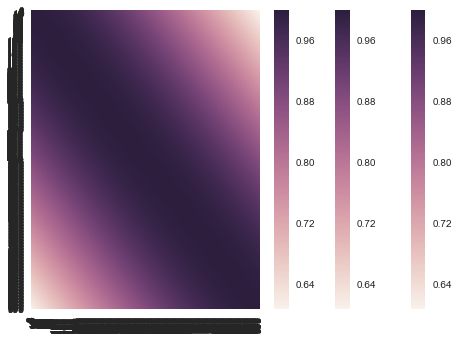

In [20]:
import seaborn as sns
sns.heatmap(cov_prior)
plt.show()

In [7]:
gp.fit(X, y)
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std=True)

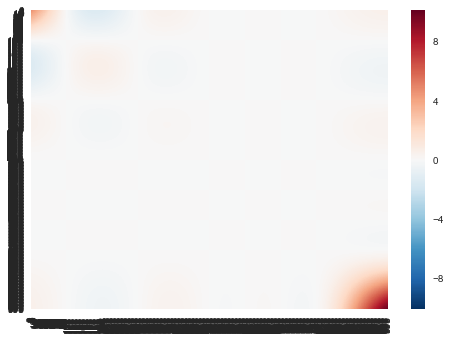

In [23]:
sns.heatmap(cov_posterior)
plt.show()

C:\Users\karvo\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


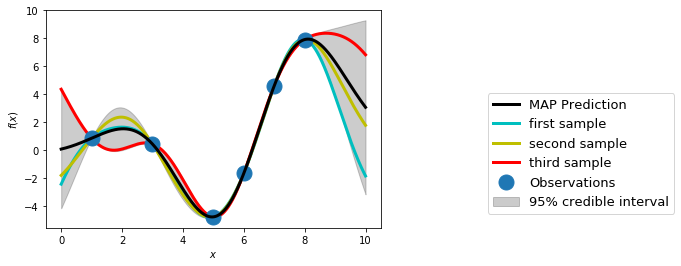

In [8]:
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)
#s=gp.sample_y(X.reshape(-1,1),1)
y_samples = gp.sample_y(x[:, np.newaxis], 3)

plt.plot(x,y_mean, 'k', lw=3, zorder=9,label=u'MAP Prediction')
plt.plot(x,y_samples[:,0], 'c', lw=3,label=u'first sample')
plt.plot(x,y_samples[:,1], 'y', lw=3,label=u'second sample')
plt.plot(x,y_samples[:,2], 'r', lw=3,label=u'third sample')
plt.fill_between(x, y_mean - 1.9600*y_std, y_mean + 1.9600*y_std,
                     alpha=0.2, color='k',label='95% credible interval')
plt.plot(X, y, '.', markersize=30, label=u'Observations')
plt.legend(bbox_to_anchor=(1.3,0.65),prop={'size':13})
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

# Covariance colorings

In [44]:
kernel1 = RBF()
kernel2 = RationalQuadratic()
kernel3 = Matern()
kernel4 = DotProduct()
gp = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=9)
gp.fit(X, y)
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, cov1 = gp.predict(x[0:15].reshape(-1,1), return_cov=True)
gp = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=9)
gp.fit(X, y)
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, cov2 = gp.predict(x[0:15].reshape(-1,1), return_cov=True)
gp = GaussianProcessRegressor(kernel=kernel3, n_restarts_optimizer=9)
gp.fit(X, y)
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, cov3 = gp.predict(x[0:15].reshape(-1,1), return_cov=True)
gp = GaussianProcessRegressor(kernel=kernel4, n_restarts_optimizer=9)
gp.fit(X, y)
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, cov4 = gp.predict(x[0:15].reshape(-1,1), return_cov=True)


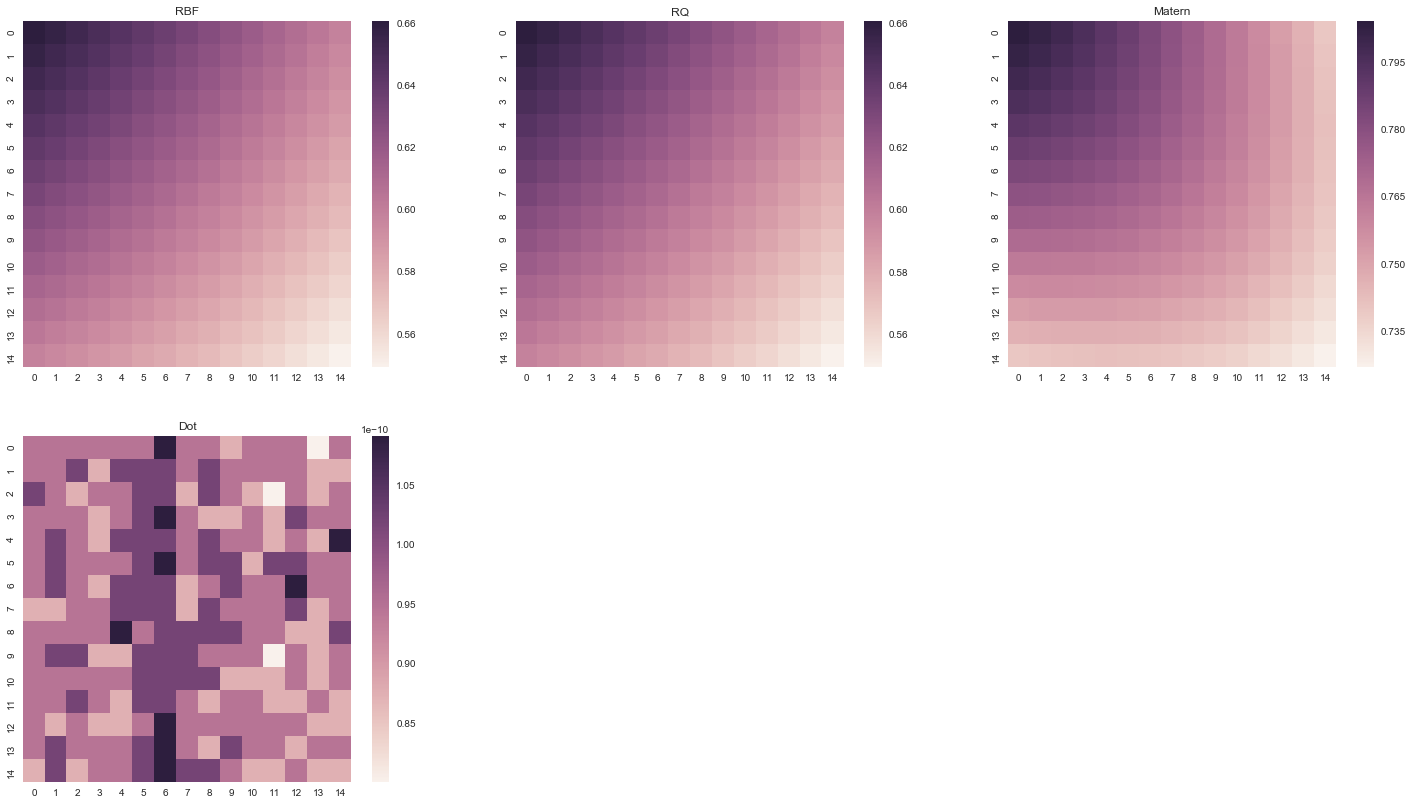

In [45]:
import seaborn as sns
plt.figure(figsize=(25, 14))
plt.subplot(231)
sns.heatmap(cov1)
plt.title('RBF')
plt.subplot(232)
sns.heatmap(cov2)
plt.title('RQ')
plt.subplot(233)
sns.heatmap(cov3)
plt.title('Matern')
plt.subplot(234)
sns.heatmap(cov4)
plt.title('Dot')
plt.show()

# Noisy case

In [9]:
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T
y = f(X).ravel()
#y_=f(X_).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
x = np.linspace(0, 10, 1000)


# Instanciate a Gaussian Process model
kernel = C() * RBF(1, (1e-2, 1e2))#+WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel,alpha=(dy / y) ** 2,n_restarts_optimizer=9)#,alpha=(dy / y) ** 2

array([ 0.44702209, -0.87692661,  0.69610095,  0.27469391,  0.58952451,
        0.46413239, -0.66756947, -0.20858758, -0.21992054, -0.22531457,
       -0.13501195, -0.21942761, -1.9188173 ,  0.44547877,  0.21925456,
        0.13354558,  0.127628  ,  0.16722377,  0.65402797, -0.44005347])

In [48]:
gp.fit(X, y)
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)
y_samples = gp.sample_y(x[:, np.newaxis], 3)

C:\Users\karvo\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


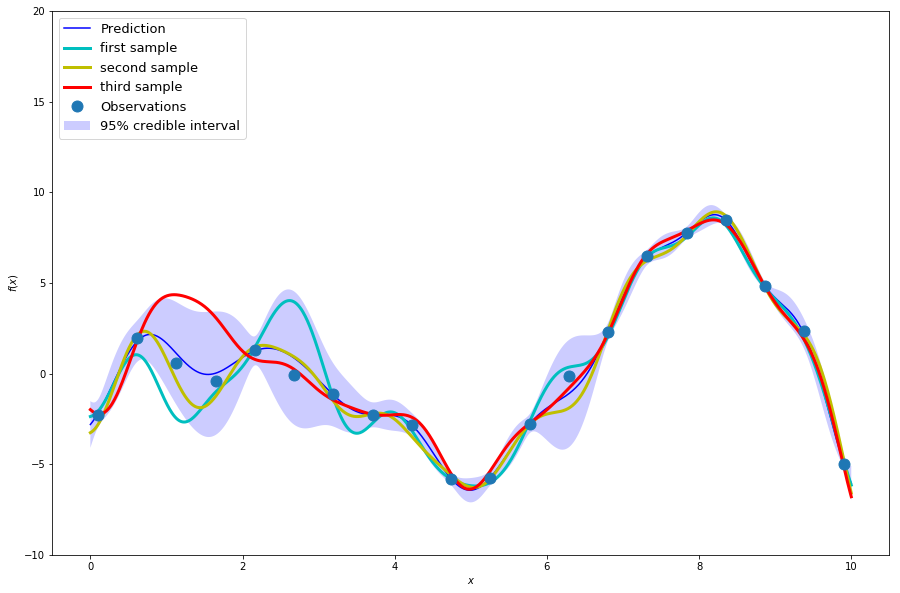

In [49]:
#plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
fig = plt.figure(figsize=(15,10))
#plt.errorbar(X.ravel(), y, dy, fmt='o', markersize=10, label=u'Observations')
plt.plot(x, y_mean, 'b-', label=u'Prediction')
plt.plot(x,y_samples[:,0], 'c', lw=3,label=u'first sample')
plt.plot(x,y_samples[:,1], 'y', lw=3,label=u'second sample')
plt.plot(x,y_samples[:,2], 'r', lw=3,label=u'third sample')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_mean - 1.9600 * y_std,
                        (y_mean + 1.9600 * y_std)[::-1]]),
         alpha=.2, fc='b', ec='None', label='95% credible interval')
plt.plot(X, y, '.', markersize=22, label=u'Observations')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left',prop={'size':13})

plt.show()

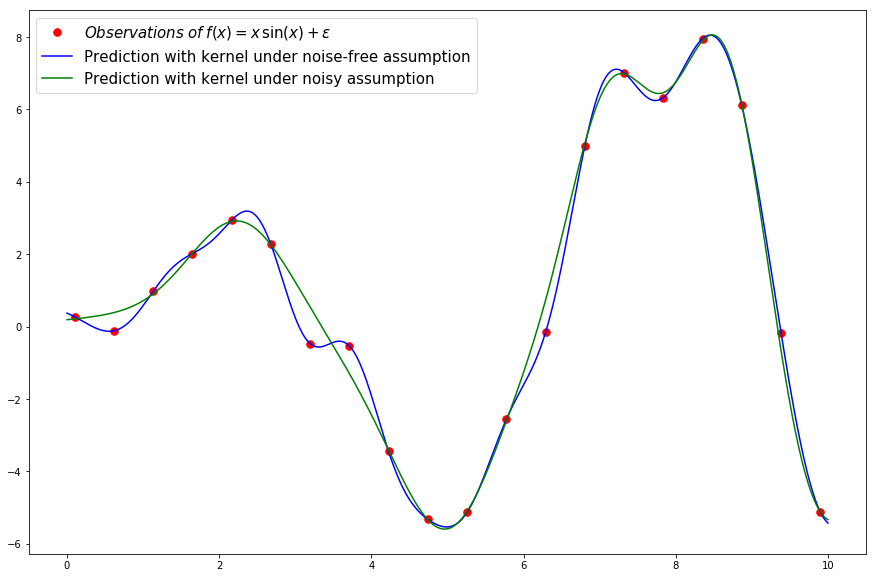

In [63]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
x = np.linspace(0, 10, 1000)
gp1 = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
gp2 = GaussianProcessRegressor(kernel=kernel,alpha=(dy / y) ** 2,n_restarts_optimizer=9)
gp1.fit(X, y)
gp2.fit(X, y)
y_mean1= gp1.predict(x[:, np.newaxis])
y_mean2= gp2.predict(x[:, np.newaxis])
fig = plt.figure(figsize=(15,10))
plt.plot(X, y, 'r.',markersize=15, label=u'$ Observations\;of\;f(x) = x\,\sin(x) + \epsilon$')
plt.plot(x, y_mean1, 'b-', label=u'Prediction with kernel under noise-free assumption')
plt.plot(x, y_mean2, 'g-', label=u'Prediction with kernel under noisy assumption')
plt.legend(loc='upper left',prop={'size':15})
plt.show()

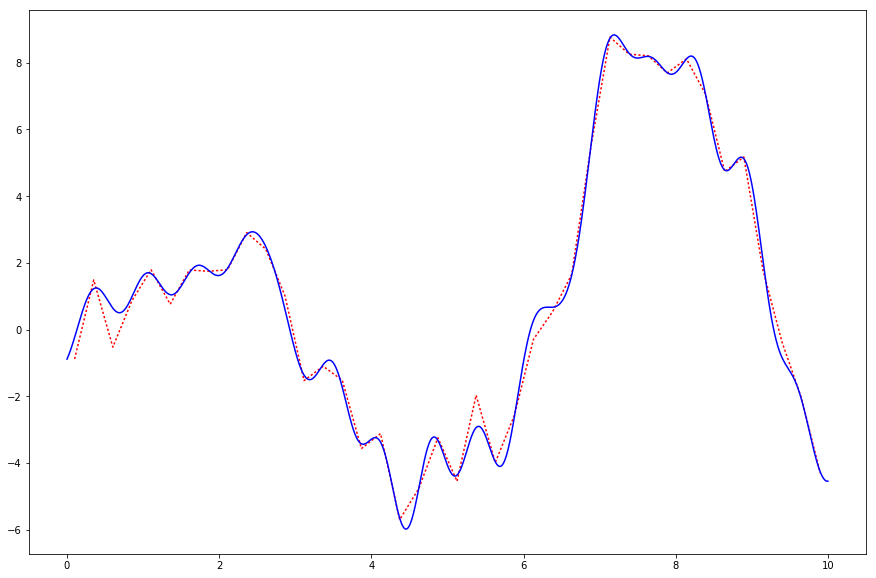

C:\Users\karvo\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


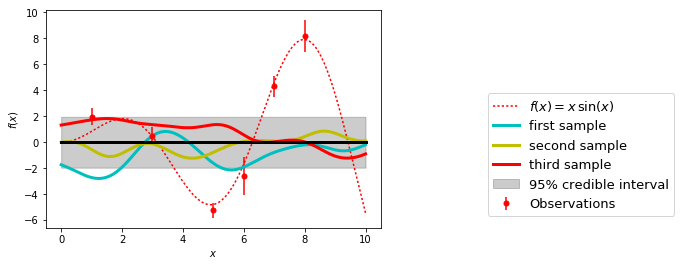

In [10]:
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)
#s=gp.sample_y(X.reshape(-1,1),1)
y_samples = gp.sample_y(x[:, np.newaxis], 3)
plt.plot(x,y_mean, 'k', lw=3, zorder=9)
plt.plot(x,y_samples[:,0], 'c', lw=3,label=u'first sample')
plt.plot(x,y_samples[:,1], 'y', lw=3,label=u'second sample')
plt.plot(x,y_samples[:,2], 'r', lw=3,label=u'third sample')
plt.fill_between(x, y_mean - 1.9600*y_std, y_mean + 1.9600*y_std,
                     alpha=0.2, color='k',label='95% credible interval')
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.3,0.65),prop={'size':13})
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

# End noisy

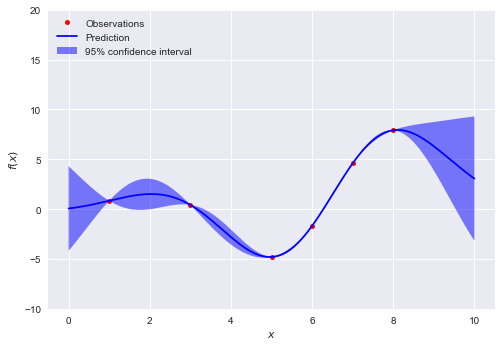

In [163]:
#fig = plt.figure(figsize=(20,10))
#plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

# Noisy

In [18]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

In [42]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

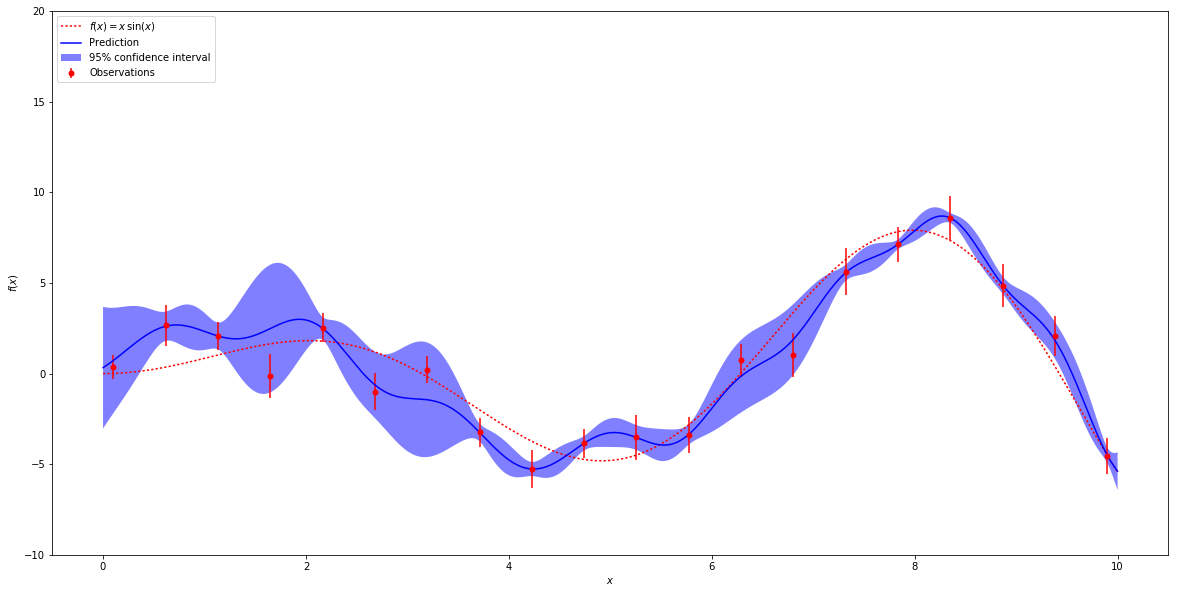

In [43]:
fig = plt.figure(figsize=(20,10))
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

# Pensylvania

In [1]:
cd C:/Users/karvo/Desktop/vinocular/spatial data analysis/stanford-course

C:\Users\karvo\Desktop\vinocular\spatial data analysis\stanford-course


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pen=pd.read_csv('pensylv2P.csv',index_col=0)
pen.head()

,lat,lon,level
1,27.975051,-145.237720,3653
2,10.433677,-132.748890,3067
3,26.550662,-128.371185,3799
4,18.943343,-127.515170,3697
5,26.237199,-126.627531,3718


In [57]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, Matern, RBF, DotProduct, RationalQuadratic
from sklearn.model_selection import train_test_split

In [28]:
X=pen.iloc[:,0:2]
y=pen.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [47]:
y_pred0, sigma0 = gp.predict(X_test, return_std=True)

In [48]:
gp.score(X_train,y_train)

-11.36652893244378

In [86]:
gp.fit(X_train, y_train)
gp.score(X_train,y_train)
y_pred, sigma = gp.predict(X_test, return_std=True)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
mean_absolute_error(y_test,y_pred),mean_absolute_error(y_test,y_pred0)

(1448.488666030893, 2285.4545454545455)

In [55]:
mean_squared_error(y_test,y_pred),mean_squared_error(y_test,y_pred0)

(3100802.0340529201, 5759379.7272727275)

In [56]:
r2_score(y_test,y_pred),r2_score(y_test,y_pred0)

(-4.7842448005466345, -9.7435630769076109)

In [206]:
kernel = RBF(1, (1e-12, 1e12))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train,y_train)
gp.kernel_
pred1,cov1=gp.predict(X_test,return_cov=True)
mse1=mean_squared_error(y_test,pred1)
r21=r2_score(y_test,pred1)
kernel =  Matern(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train,y_train)
pred2,cov2=gp.predict(X_test,return_cov=True)
mse2=mean_squared_error(y_test,pred2)
r22=r2_score(y_test,pred2)
kernel=WhiteKernel(noise_level=.63)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train,y_train)
pred3,cov3=gp.predict(X_test,return_cov=True)
mse3=mean_squared_error(y_test,pred3)
r23=r2_score(y_test,pred3)
kernel=RationalQuadratic(alpha=10**2)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
pred4,cov4=gp.predict(X_test,return_cov=True)
mse4=mean_squared_error(y_test,pred4)
r24=r2_score(y_test,pred4)
kernel=DotProduct()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
pred5,cov5=gp.predict(X_test,return_cov=True)
mse5=mean_squared_error(y_test,pred5)
r25=r2_score(y_test,pred5)

In [207]:
dataz=[mse1,mse2,mse3,mse4,mse5]
sigmas=[sigma1,sigma2,sigma3,sigma4,sigma5]
df=pd.DataFrame(data=dataz)
df.columns=['mse']
df=df.set_index([['RBF','Matern','White Kernel','Rational Quadratic','Dot Product']])
df['r2']=[r21,r22,r23,r24,r25]
df

,mse,r2
RBF,3.100802e+06,-4.784245
Matern,5.420779e+05,-0.011194
White Kernel,5.759380e+06,-9.743563
Rational Quadratic,5.759380e+06,-9.743563
Dot Product,5.759380e+06,-9.743563


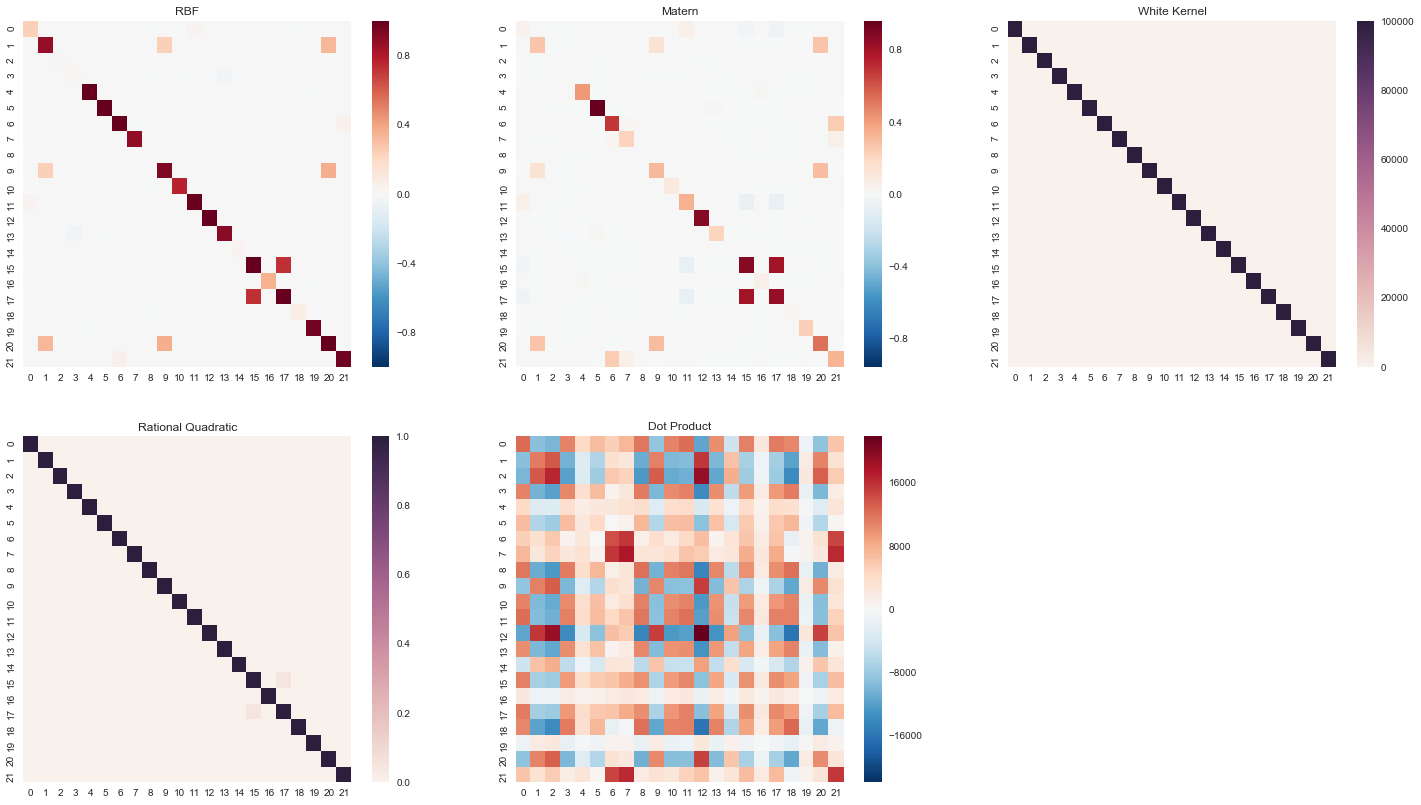

In [208]:
import seaborn as sns
plt.figure(figsize=(25, 14))
plt.subplot(231)
sns.heatmap(cov1)
plt.title('RBF')
plt.subplot(232)
sns.heatmap(cov2)
plt.title('Matern')
plt.subplot(233)
sns.heatmap(cov3)
plt.title('White Kernel')
plt.subplot(234)
sns.heatmap(cov4)
plt.title('Rational Quadratic')
plt.subplot(235)
sns.heatmap(cov5)
plt.title('Dot Product')
plt.show()

# AGAIN

In [210]:
import numpy as np
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] *     np.subtract.outer(x, y)**2)

In [211]:
def conditional(x_new, x, y, params):

    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())


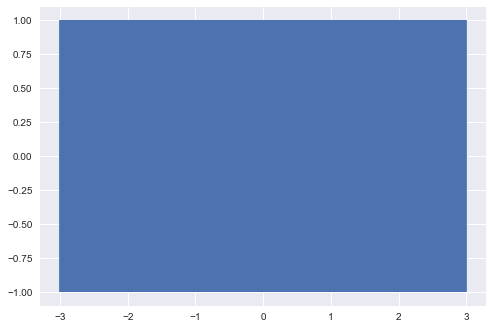

In [253]:
import matplotlib.pylab as plt

θ = [1, 10]

σ_0 = exponential_cov(0, 0, θ)

xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
plt.show()


In [254]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
y


[-0.26615312724706114]

In [255]:
σ_1 = exponential_cov(x, x, θ)
def predict(x, data, kernel, params, sigma, t):

    k = [kernel(x, y, params) for y in data]

    Sinv = np.linalg.inv(sigma)

    y_pred = np.dot(k, Sinv).dot(t)

    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)

    return y_pred, sigma_new
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]


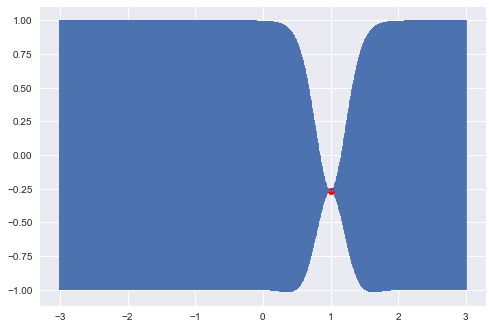

In [256]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.show()

In [257]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
y2


-0.2459015167110891

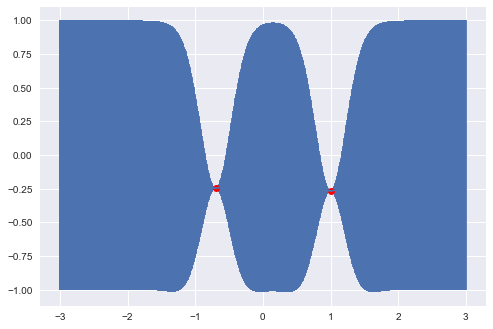

In [258]:
x.append(-0.7)
y.append(y2)
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.show()

In [259]:
x_more = [-2., -1.5, 0.3, 1.3, 2.]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([ 0.90258915,  0.09001484,  0.65479913, -0.54415818, -1.00632457])

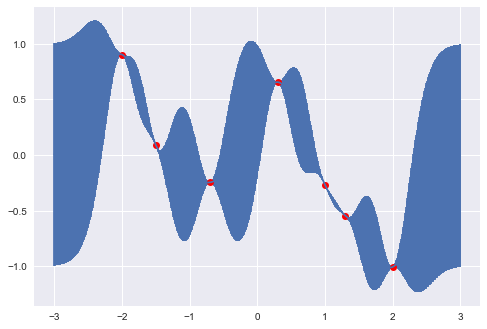

In [260]:
x += x_more
y += y_more.tolist()
σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.show()

In [261]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

# micasense

In [1]:
cd C:/Users/karvo/Desktop/aueb/diplwmatiki

C:\Users\karvo\Desktop\aueb\diplwmatiki


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel,RBF
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('df_pts.csv',index_col=0)

In [4]:
df.head()

,blue,green,red,red-edge,nir,x,y,ripeness
1,3984,6301,10506,13732,18379,318060.577386,6.239846e+06,0.944875
2,4119,6483,10822,13993,18797,318060.710336,6.239846e+06,0.984154
3,4207,6551,10594,14247,18678,318060.843287,6.239846e+06,0.670771
4,4081,6356,10625,13931,18611,318060.444435,6.239846e+06,0.874814
5,4006,6241,10504,13691,18309,318060.577386,6.239846e+06,0.479927


In [17]:
df.iloc[:,7].head()

1    0.944875
2    0.984154
3    0.670771
4    0.874814
5    0.479927
Name: ripeness, dtype: float64

In [5]:
X=df.iloc[0:300,0:7]
y=df.iloc[0:300,7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
kernel=RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train,y_train)
y_pred=gp.predict(X_test,return_std=True)

In [7]:
y_pred

(array([  6.96245373e-04,   1.18158890e-02,   1.35232710e-02,
          9.25783215e-03,   6.80810134e-02,   1.41279462e-03,
          1.18528185e-04,   6.27999752e-03,   2.74576670e-01,
          1.54051169e-04,   3.04580664e-08,   3.65462959e-04,
          5.85492822e-02,   2.03324818e-03,   1.72870682e-02,
          1.41478486e-01,   1.56674006e-02,   6.07515211e-03,
          1.40396496e-03,   1.32616748e-03,   3.15570456e-01,
          1.80310765e-01,   2.72542786e-08,   7.82821403e-07,
          4.59917987e-01,   3.52796924e-89,   2.49049304e-02,
          9.49519446e-11,   3.43205341e-01,   2.34353037e-04,
          6.10196423e-03,   2.33954428e-04,   7.50180192e-02,
          2.22805021e-01,   4.40856821e-03,   4.00915143e-03,
          2.13970643e-15,   2.88238734e-01,   1.35478131e-04,
          9.92880817e-03,   3.80487403e-02,   8.73266780e-11,
          1.54510091e-03,   4.00788710e-02,   1.04249900e-02,
          1.40636430e-04,   1.79023152e-02,   6.09492916e-05,
        

# Meuse

In [1]:
cd C:/Users/karvo/Desktop/aueb/diplwmatiki

C:\Users\karvo\Desktop\aueb\diplwmatiki


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern,WhiteKernel, ConstantKernel,RBF,ExpSineSquared,RationalQuadratic,PairwiseKernel,DotProduct
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('meuse2python.csv',index_col=0)

In [4]:
df.head()

,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m,x,y
1,11.7,85,299,NaN,7.909,0.001358,13.6,1,1,1,Ah,50,5.758536,50.991562
2,8.6,81,277,1141.0,6.983,0.012224,14.0,1,1,1,Ah,30,5.757863,50.991088
3,6.5,68,199,NaN,7.800,0.103029,13.0,1,1,1,Ah,150,5.759855,50.990893
4,2.6,81,116,257.0,7.655,0.190094,8.0,1,2,0,Ga,270,5.761746,50.990410
5,2.8,48,117,269.0,7.480,0.277090,8.7,1,2,0,Ah,380,5.761863,50.989026


In [34]:
df1=df[df.lead.notnull()]
df2=df[df.lead.isnull()]
x_train=df1.iloc[:,[4,5,7,8,9,12,13]]
y_train=df1['zinc']
x_test=df2.iloc[:,[4,5,7,8,9,12,13]]

In [65]:
x_train.head()

,elev,dist,ffreq,soil,lime,x,y
1,7.909,0.001358,1,1,1,5.758536,50.991562
2,6.983,0.012224,1,1,1,5.757863,50.991088
4,7.655,0.190094,1,2,0,5.761746,50.990410
6,7.791,0.364067,1,2,0,5.763040,50.988393
7,8.217,0.190094,1,2,0,5.759843,50.989392


In [66]:
import numpy as np
np.any(np.isnan(df.iloc[:,6]))

True

In [87]:
kernel1=ConstantKernel()*RBF(1, (1e-1, 10))
kernel=ConstantKernel()*RBF(1, (1e-1, 10))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3)
gp.fit(x_train,y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), n_restarts_optimizer=3,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [90]:
gp.kernel_,gp.log_marginal_likelihood_value_

(196**2 * RBF(length_scale=0.1), -743.57868253340246)

In [55]:
y_pred=gp.predict(x_test,return_std=True)

In [56]:
y_pred

(array([ -1.36059766e+02,   3.08936643e+01,   1.74285409e+02,
          5.85592572e+01,   3.97764898e+01,   6.52490519e+01,
          6.54766828e+01,   3.33344624e+02,   3.15294374e+02,
         -5.67196713e+01,   3.14582053e-10,   3.88821901e+01,
          1.50823227e+02,   1.81226231e+02,   1.31986049e+02,
          3.90004780e-04,   7.27803958e+01,   1.28369938e+02,
          1.76935318e+00,   9.69452429e+01,   4.88232537e+02,
          2.42723038e+02,   2.42306327e-04,   3.83232926e+01,
          9.87373474e-18,   4.36002410e+01,   5.15914568e+01,
          2.06881257e+01,   4.94911842e+01,   6.05213380e-17,
          4.40040116e+01,   7.04026705e+01,   2.90111669e+01,
          3.90805438e+00,   7.56438980e-21,   3.35824535e+01,
          3.43936441e+01,   1.01497692e+01,   1.91702342e+00,
          1.39625085e+00]),
 array([ 0.37427493,  0.97918603,  0.03999825,  0.23510957,  0.95721175,
         0.66600862,  0.89403695,  0.56518724,  0.20315631,  0.83118251,
         1.        ,

In [57]:
df2['pred_mean']=y_pred[0]
df2['pred_std']=y_pred[1]

C:\Users\karvo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\karvo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
df2

,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m,x,y,pred_mean,pred_std
3,6.5,68,NaN,640,7.800,0.103029,13.0,1,1,1,Ah,150,5.759855,50.990893,-1.360598e+02,0.374275
5,2.8,48,NaN,269,7.480,0.277090,8.7,1,2,0,Ah,380,5.761863,50.989026,3.089366e+01,0.979186
19,8.7,69,NaN,735,7.020,0.000000,13.7,1,1,1,W,10,5.752116,50.984715,1.742854e+02,0.039998
28,1.3,24,NaN,180,8.743,0.320574,4.4,1,2,0,Ag,400,5.757060,50.983261,5.855926e+01,0.235110
34,1.2,26,NaN,192,7.971,0.385807,1.9,1,2,0,B,500,5.756768,50.980673,3.977649e+01,0.957212
38,5.8,50,NaN,569,7.756,0.135709,3.5,1,2,0,Ab,210,5.752187,50.981101,6.524905e+01,0.666009
42,2.4,32,NaN,298,7.516,0.135709,1.4,1,2,0,Am,170,5.750213,50.980074,6.547668e+01,0.894037
53,8.2,47,NaN,812,8.060,0.001358,11.1,1,1,1,Ah,10,5.746556,50.980274,3.333446e+02,0.565187
55,12.0,117,NaN,1839,7.900,0.005432,16.5,1,1,1,W,10,5.742790,50.979423,3.152944e+02,0.203156
57,8.2,76,NaN,933,7.552,0.005432,8.1,1,1,1,W,20,5.738711,50.978590,-5.671967e+01,0.831183


In [59]:
df2.to_csv('meuse_def_pred.csv',index=False)

# Model selection

In [114]:
kernel1=RBF(length_scale=1)
kernel2=ConstantKernel()*RBF(length_scale=1)
kernel3=ConstantKernel()*RBF(length_scale=1)+WhiteKernel()
kernel4=RBF(length_scale=1)+WhiteKernel()
kernel5=Matern()
kernel6=ConstantKernel()*Matern()+WhiteKernel()
kernel7=RationalQuadratic()
kernel8=ConstantKernel()*RationalQuadratic()+WhiteKernel()
gp1 = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=8)
gp2 = GaussianProcessRegressor(kernel=kernel2, n_restarts_optimizer=8)
gp3 = GaussianProcessRegressor(kernel=kernel3, n_restarts_optimizer=8)
gp4 = GaussianProcessRegressor(kernel=kernel4, n_restarts_optimizer=8)
gp5 = GaussianProcessRegressor(kernel=kernel5, n_restarts_optimizer=8)
gp6 = GaussianProcessRegressor(kernel=kernel6, n_restarts_optimizer=8)
gp7 = GaussianProcessRegressor(kernel=kernel7, n_restarts_optimizer=8)
gp8 = GaussianProcessRegressor(kernel=kernel8, n_restarts_optimizer=8)
gp1.fit(x_train,y_train)
gp2.fit(x_train,y_train)
gp3.fit(x_train,y_train)
gp4.fit(x_train,y_train)
gp5.fit(x_train,y_train)
gp6.fit(x_train,y_train)
gp7.fit(x_train,y_train)
gp8.fit(x_train,y_train)
y_pred1,std1=gp1.predict(x_test,return_std=True)
y_pred2,std2=gp2.predict(x_test,return_std=True)
y_pred3,std3=gp3.predict(x_test,return_std=True)
y_pred4,std4=gp4.predict(x_test,return_std=True)
y_pred5,std5=gp5.predict(x_test,return_std=True)
y_pred6,std6=gp6.predict(x_test,return_std=True)
y_pred7,std7=gp7.predict(x_test,return_std=True)
y_pred8,std8=gp8.predict(x_test,return_std=True)
print('kernel1 :',gp1.kernel_,gp1.log_marginal_likelihood_value_,std1.sum())
print('kernel2 :',gp2.kernel_,gp2.log_marginal_likelihood_value_,std2.sum())
print('kernel3 :',gp3.kernel_,gp3.log_marginal_likelihood_value_,std3.sum())
print('kernel4 :',gp4.kernel_,gp4.log_marginal_likelihood_value_,std4.sum())
print('kernel5 :',gp5.kernel_,gp5.log_marginal_likelihood_value_,std5.sum())
print('kernel6 :',gp6.kernel_,gp6.log_marginal_likelihood_value_,std6.sum())
print('kernel7 :',gp7.kernel_,gp7.log_marginal_likelihood_value_,std7.sum())
print('kernel8 :',gp8.kernel_,gp8.log_marginal_likelihood_value_,std8.sum())

kernel1 : RBF(length_scale=1e-05) -1926429.67774 40.0
kernel2 : 183**2 * RBF(length_scale=1e-05) -762.289931506 7321.34271865
kernel3 : 192**2 * RBF(length_scale=3.71) + WhiteKernel(noise_level=5.66e+03) -671.403825376 3122.54013108
kernel4 : RBF(length_scale=1e+05) + WhiteKernel(noise_level=3.34e+04) -762.163255687 7305.22284437
kernel5 : Matern(length_scale=0.0916, nu=1.5) -1499140.57979 33.1614963994
kernel6 : 149**2 * Matern(length_scale=2.07, nu=1.5) + WhiteKernel(noise_level=4.14e+03) -669.214316518 2944.89857441
kernel7 : RationalQuadratic(alpha=0.162, length_scale=0.00891) -603748.360888 34.1673244843
kernel8 : 289**2 * RationalQuadratic(alpha=0.00831, length_scale=0.185) + WhiteKernel(noise_level=2.17e+03) -669.9219448 3018.7784389


In [119]:
std3

array([ 76.93909707,  77.35748787,  76.91276194,  76.4323534 ,
        76.78508907,  77.19893082,  77.50918427,  77.17827264,
        77.02463651,  76.83796484,  77.36408572,  78.12760375,
        76.815119  ,  76.80976838,  76.80543778,  80.49901814,
        79.03787701,  78.20985029,  79.55667227,  76.81714971,
        77.98913128,  76.78364038,  80.89065447,  76.49980619,
        79.17845368,  76.90564995,  77.28158565,  77.01600676,
        76.66657103,  82.88350438,  76.42257529,  78.44452639,
        78.69008749,  79.83156384,  86.21064498,  78.2446539 ,
        77.4172977 ,  77.61336893,  77.88236994,  79.46967838])

# Zinc

In [13]:
cd C:/Users/karvo/Desktop/aueb/diplwmatiki

C:\Users\karvo\Desktop\aueb\diplwmatiki


In [14]:
import pandas as pd
df=pd.read_csv('meuse2python.csv',index_col=0)

In [3]:
df.head()

,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m,x,y
1,11.7,85,299,NaN,7.909,0.001358,13.6,1,1,1,Ah,50,5.758536,50.991562
2,8.6,81,277,1141.0,6.983,0.012224,14.0,1,1,1,Ah,30,5.757863,50.991088
3,6.5,68,199,NaN,7.800,0.103029,13.0,1,1,1,Ah,150,5.759855,50.990893
4,2.6,81,116,257.0,7.655,0.190094,8.0,1,2,0,Ga,270,5.761746,50.990410
5,2.8,48,117,269.0,7.480,0.277090,8.7,1,2,0,Ah,380,5.761863,50.989026


In [15]:
df1=df[df.zinc.notnull()]
df2=df[df.zinc.isnull()]
from sklearn.model_selection import train_test_split,LeaveOneOut
from sklearn.pipeline import make_pipeline
import re
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
X=df1.iloc[:,[4,5,12,13]]
X_test_set=df2.iloc[:,[4,5,12,13]]
Y=df1['zinc']


In [13]:
X.head()

,elev,dist,x,y
2,6.983,0.012224,5.757863,50.991088
4,7.655,0.190094,5.761746,50.990410
5,7.480,0.277090,5.761863,50.989026
6,7.791,0.364067,5.763040,50.988393
8,8.490,0.092152,5.757877,50.989335


In [60]:
kernel1=RBF()
kernel2=RationalQuadratic()
kernel3=Matern()
kernel4=ExpSineSquared()
kernel5=ConstantKernel()*Matern()
kernel6=ConstantKernel()*RationalQuadratic()
model1=GaussianProcessRegressor(kernel=kernel1,n_restarts_optimizer=3)
model2=GaussianProcessRegressor(kernel=kernel2,n_restarts_optimizer=3)
model3=GaussianProcessRegressor(kernel=kernel3,n_restarts_optimizer=3)
model4=GaussianProcessRegressor(kernel=kernel4,n_restarts_optimizer=3)
model5=GaussianProcessRegressor(kernel=kernel5,n_restarts_optimizer=3)
model6=GaussianProcessRegressor(kernel=kernel6,n_restarts_optimizer=3)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1,X,Y,cv=5,scoring='neg_mean_squared_error')
scores2=cross_val_score(model2,X,Y,cv=5,scoring='neg_mean_squared_error')
scores3=cross_val_score(model3,X,Y,cv=5,scoring='neg_mean_squared_error')
scores4=cross_val_score(model4,X,Y,cv=5,scoring='neg_mean_squared_error')
scores5=cross_val_score(model5,X,Y,cv=5,scoring='neg_mean_squared_error')
scores6=cross_val_score(model6,X,Y,cv=5,scoring='neg_mean_squared_error')

scores.mean(),scores2.mean(),scores3.mean(),scores4.mean(),scores5.mean(),scores6.mean()

In [15]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
kernel1=RBF()
gp1 = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=8)

In [6]:
#loop1
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
kf = KFold(n_splits=8)
kernel_smse=0
kernel_nlpd=0
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    gp1.fit(X_train,y_train)
    y_pred1,std1=gp1.predict(X_test,return_std=True)
    smse=mse(y_test,y_pred1)/y_test.var()
    kernel_smse+=smse
    l=0
    test_nlpd=0
    for i in y_test:
        sigma_star_squared=std1[l]
        nlpd=1/2*np.log(2*np.pi*sigma_star_squared)+((i-y_pred1[l])**2)/(2*sigma_star_squared)
        l+=1
        test_nlpd+=nlpd
    test_nlpd=test_nlpd/y_test.shape[0]
    kernel_nlpd+=test_nlpd
kernel_smse=kernel_smse/8
kernel_nlpd=kernel_nlpd/8    

NameError: name 'gp1' is not defined

#loop1
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
kf = KFold(n_splits=8)
kernel_smse=0
kernel_nlpd=0
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    gp1.fit(X_train,y_train)
    y_pred1,std1=gp1.predict(X_test,return_std=True)
    smse=mse(y_test,y_pred1)/y_test.var()
    kernel_smse+=smse
    l=0
    test_nlpd=0
    for i in y_test:
        sigma_star_squared=std1[l]
        nlpd=1/2*np.log(2*np.pi*sigma_star_squared)+((i-y_pred1[l])**2)/(2*sigma_star_squared)
        l+=1
        test_nlpd+=nlpd
    test_nlpd=test_nlpd/y_test.shape[0]
    kernel_nlpd+=test_nlpd
kernel_smse=kernel_smse/8
kernel_nlpd=kernel_nlpd/8
    

# The Real one on Meuse

In [2]:
cd C:/Users/karvo/Desktop/aueb/diplwmatiki

C:\Users\karvo\Desktop\aueb\diplwmatiki


In [3]:
import pandas as pd
df=pd.read_csv('meuse2python.csv',index_col=0)
df1=df[df.zinc.notnull()]
df2=df[df.zinc.isnull()]
from sklearn.model_selection import train_test_split,LeaveOneOut
from sklearn.pipeline import make_pipeline
import re
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
X=df1.iloc[:,[4,5,12,13]]
X_test_set=df2.iloc[:,[4,5,12,13]]
Y=df1['zinc']


In [6]:
#loop2
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from sklearn.gaussian_process.kernels import ConstantKernel,ExpSineSquared,Matern,RBF,WhiteKernel,RationalQuadratic,DotProduct
from gp_extras.kernels import HeteroscedasticKernel
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
kernel_set=[ConstantKernel()*RBF()+WhiteKernel(),
            ConstantKernel()*Matern()+WhiteKernel(),ConstantKernel()*RationalQuadratic()+WhiteKernel(),
            ConstantKernel()*ExpSineSquared()+WhiteKernel(),
            ConstantKernel()*DotProduct()+WhiteKernel()]
SMSES=[]
NLPDS=[]
post_cov=[]
for kernel in kernel_set:
    kf = KFold(n_splits=5)
    kernel_smse=0
    kernel_nlpd=0
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        gp=GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=5).fit(X_train,y_train)
        y_pred,std=gp.predict(X_test,return_std=True)
        smse=mse(y_test,y_pred)/y_test.var()
        kernel_smse+=smse
        l=0
        test_nlpd=0
        m=re.findall('(noise_level=(.*).)',str(gp.kernel_),re.DOTALL)
        for i in y_test:
            sigma_star_squared=std[l]#+float(m[0][1])
            nlpd=1/2*np.log(2*np.pi*sigma_star_squared)+((i-y_pred[l])**2)/(2*sigma_star_squared)
            l+=1
            test_nlpd+=nlpd
        test_nlpd=test_nlpd/y_test.shape[0]
        kernel_nlpd+=test_nlpd
    kernel_smse=kernel_smse/5
    kernel_nlpd=kernel_nlpd/5
    SMSES.append(kernel_smse)
    NLPDS.append(kernel_nlpd)
    gp=GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=5).fit(X,Y)
    post_cov.append(gp.kernel_)

In [7]:
table=[('posterior covariance',post_cov),('SMSE',SMSES),('NLPD',NLPDS)]
table=pd.DataFrame.from_items(table)
pd.set_option('display.max_colwidth', -1)
table

,posterior covariance,SMSE,NLPD
0,316**2 * RBF(length_scale=0.879) + WhiteKernel(noise_level=4.4e+04),2.829702,220.555307
1,"316**2 * Matern(length_scale=1.07, nu=1.5) + WhiteKernel(noise_level=4.14e+04)",2.392357,153.918649
2,"316**2 * RationalQuadratic(alpha=0.158, length_scale=0.0544) + WhiteKernel(noise_level=4.02e+03)",2.345033,138.135127
3,"316**2 * ExpSineSquared(length_scale=4.1e+03, periodicity=1e+05) + WhiteKernel(noise_level=1e+05)",15.149002,216.606436
4,316**2 * DotProduct(sigma_0=3.62e-05) + WhiteKernel(noise_level=6.04e+04),7.186723,147.640353


In [8]:
gp=GaussianProcessRegressor(kernel=kernel_set[2],alpha=0.0,n_restarts_optimizer=5).fit(X,Y)
y_pred,std=gp.predict(X_test_set,return_std=True)
df2['pred_mean']=y_pred
df2['pred_std']=std    

C:\Users\karvo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\karvo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [450]:
df2

,red,green,blue,ir,ndvi,rdvi,rvi,x,y,weight,TAP,ph,OO,TA.OO,TA.weight,TA.ph,pred_mean,pred_std
cell,,,,,,,,,,,,,,,,,,
49350,68.374393,58.440953,36.758343,103.81,0.212466,2.743476,1.576475,23.952024,38.005532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.296909,0.169889
49669,67.084631,64.983854,40.310948,105.93,0.232825,3.006619,1.657436,23.952012,38.005529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.295744,0.169733
49664,52.549023,48.680361,39.151922,102.52,0.321827,4.008493,1.991058,23.951996,38.005529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.303516,0.170476
49983,48.668372,45.897154,35.811958,105.41,0.372902,4.596565,2.224121,23.951984,38.005526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.306006,0.170886
50302,54.771317,51.946406,38.006128,104.46,0.325095,4.014585,2.049793,23.951972,38.005523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302911,0.170378
50621,56.906849,52.891462,41.644043,103.37,0.289927,3.669556,1.827495,23.951960,38.005520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.301335,0.170109
50940,71.959411,66.662258,48.789006,100.44,0.169195,2.192947,1.426316,23.951948,38.005517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293290,0.169292
50934,110.995854,101.738137,79.868684,63.16,-0.259819,-3.519594,0.601165,23.951930,38.005517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.270907,0.171217
51253,120.735508,101.500230,76.407935,75.10,-0.218553,-3.150163,0.674267,23.951918,38.005514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.269326,0.170402


In [9]:
import pandas as pd
df2.to_csv('meuse_predictions_3.csv',index=False)

# gp_extras

In [40]:
from gp_extras.kernels import HeteroscedasticKernel

# THE REAL ONE!


In [1]:
cd C:/Users/karvo/Desktop/vinocular/lytras winery/lytras 2/Field 1/modifications

C:\Users\karvo\Desktop\vinocular\lytras winery\lytras 2\Field 1\modifications


In [423]:
import numpy as np
import pandas as pd
df=pd.read_csv('df_last2.csv',index_col=0)

In [449]:
df1.iloc[:,[0,1,2,3,4,7,8,13]].head()

,red,green,blue,ir,ndvi,x,y,TA.OO
cell,,,,,,,,
52523,47.454519,48.289348,36.637008,106.88,0.385081,23.951851,38.005501,1.227723
48681,75.508617,68.965478,44.009110,111.43,0.196959,23.951954,38.005538,1.343750
54709,99.689756,93.139695,63.837746,104.54,0.033965,23.951624,38.005480,0.927419
48003,66.554706,66.616330,46.729278,109.90,0.262506,23.951857,38.005544,1.347368
50228,91.807513,87.032076,59.069802,113.33,0.114995,23.951748,38.005523,1.096154


In [424]:
df1=df[df.weight.notnull()]
df2=df[df.weight.isnull()]
from sklearn.model_selection import train_test_split,LeaveOneOut
from sklearn.pipeline import make_pipeline
import re
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
X=df1.iloc[:,[0,1,2,3,4,7,8]]
X_test_set=df2.iloc[:,[0,1,2,3,4,7,8]]
Y=df1['TA.OO']
s=MinMaxScaler()
X=s.fit_transform(X)
X=pd.DataFrame(X)
X_test_set=pd.DataFrame(s.fit_transform(X_test_set))

In [425]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from sklearn.gaussian_process.kernels import ConstantKernel,ExpSineSquared,Matern,RBF,WhiteKernel,RationalQuadratic,DotProduct,ExpSineSquared
from gp_extras.kernels import HeteroscedasticKernel, LocalLengthScalesKernel
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error as mse
kernel_set=[ConstantKernel()*RBF()+WhiteKernel(),ConstantKernel()*Matern()+WhiteKernel(),
           ConstantKernel()*RationalQuadratic()+WhiteKernel(),
           ConstantKernel()*ExpSineSquared()+WhiteKernel(),
           ConstantKernel()*RBF()*RBF()+WhiteKernel(),ConstantKernel()*RBF()*Matern()+WhiteKernel(),
           ConstantKernel()*Matern()*Matern()+WhiteKernel(),ConstantKernel()*RBF()+ConstantKernel()*RBF()+WhiteKernel(),
           ConstantKernel()*ExpSineSquared()+ConstantKernel()*RBF()+WhiteKernel(),
           ConstantKernel()*ExpSineSquared()+ConstantKernel()*RationalQuadratic()+WhiteKernel(),
                      ConstantKernel()*ExpSineSquared()+ConstantKernel()*Matern()+WhiteKernel()]

SMSES=[]
NLPDS=[]
post_cov=[]
for kernel in kernel_set:
    kf = KFold(n_splits=15)
    kernel_smse=0
    kernel_nlpd=0
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        gp=GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=6).fit(X_train,y_train)
        y_pred,std=gp.predict(X_test,return_std=True)
        smse=mse(y_test,y_pred)/y_test.var()
        kernel_smse+=smse
        l=0
        test_nlpd=0
        for i in y_test:
            sigma_star_squared=std[l]
            nlpd=1/2*np.log(2*np.pi*sigma_star_squared)+((i-y_pred[l])**2)/(2*sigma_star_squared)
            l+=1
            test_nlpd+=nlpd
        test_nlpd=test_nlpd/y_test.shape[0]
        kernel_nlpd+=test_nlpd
    kernel_smse=kernel_smse/15
    kernel_nlpd=kernel_nlpd/15
    SMSES.append(kernel_smse)
    NLPDS.append(kernel_nlpd)
    gp=GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=5).fit(X,Y)
    post_cov.append(gp.kernel_)

In [426]:
table=[('posterior covariance',post_cov),('SMSE',SMSES),('NLPD',NLPDS)]
table=pd.DataFrame.from_items(table)
pd.set_option('display.max_colwidth', -1)
table

,posterior covariance,SMSE,NLPD
0,1.29**2 * RBF(length_scale=31) + WhiteKernel(noise_level=0.0278),1.083689,0.117819
1,"1.29**2 * Matern(length_scale=52.8, nu=1.5) + WhiteKernel(noise_level=0.0278)",1.083825,0.117908
2,"1.28**2 * RationalQuadratic(alpha=0.00146, length_scale=25.7) + WhiteKernel(noise_level=0.0277)",1.111897,0.120626
3,"1.29**2 * ExpSineSquared(length_scale=7.79, periodicity=24.9) + WhiteKernel(noise_level=0.0278)",1.072662,0.167999
4,1.29**2 * RBF(length_scale=31) * RBF(length_scale=1.07e+03) + WhiteKernel(noise_level=0.0278),1.083686,0.117819
5,"1.29**2 * RBF(length_scale=1.03e+04) * Matern(length_scale=52.8, nu=1.5) + WhiteKernel(noise_level=0.0278)",1.084541,0.117923
6,"1.29**2 * Matern(length_scale=52.8, nu=1.5) * Matern(length_scale=7.78e+04, nu=1.5) + WhiteKernel(noise_level=0.0278)",1.084027,0.117912
7,1.29**2 * RBF(length_scale=31) + 0.00473**2 * RBF(length_scale=118) + WhiteKernel(noise_level=0.0278),1.125954,0.122336
8,"1.15**2 * ExpSineSquared(length_scale=0.228, periodicity=7.18e+03) + 0.574**2 * RBF(length_scale=13.9) + WhiteKernel(noise_level=0.0278)",1.060862,0.117571
9,"0.684**2 * ExpSineSquared(length_scale=21.1, periodicity=0.000491) + 3.1**2 * RationalQuadratic(alpha=1.43e-05, length_scale=0.0424) + WhiteKernel(noise_level=0.0248)",1.088955,0.117613


In [427]:
gp=GaussianProcessRegressor(kernel=kernel_set[8],alpha=0.0,n_restarts_optimizer=5).fit(X,Y)
y_pred,std=gp.predict(X_test_set,return_std=True)
df2['pred_mean']=y_pred
df2['pred_std']=std

C:\Users\karvo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\karvo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [428]:
df2.head()

,red,green,blue,ir,ndvi,rdvi,rvi,x,y,weight,TAP,ph,OO,TA.OO,TA.weight,TA.ph,pred_mean,pred_std
cell,,,,,,,,,,,,,,,,,,
49350,68.374393,58.440953,36.758343,103.81,0.212466,2.743476,1.576475,23.952024,38.005532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.296909,0.169889
49669,67.084631,64.983854,40.310948,105.93,0.232825,3.006619,1.657436,23.952012,38.005529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.295744,0.169733
49664,52.549023,48.680361,39.151922,102.52,0.321827,4.008493,1.991058,23.951996,38.005529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.303516,0.170476
49983,48.668372,45.897154,35.811958,105.41,0.372902,4.596565,2.224121,23.951984,38.005526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.306006,0.170886
50302,54.771317,51.946406,38.006128,104.46,0.325095,4.014585,2.049793,23.951972,38.005523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302911,0.170378


In [451]:
df2.head()

,red,green,blue,ir,ndvi,rdvi,rvi,x,y,weight,TAP,ph,OO,TA.OO,TA.weight,TA.ph,pred_mean,pred_std
cell,,,,,,,,,,,,,,,,,,
49350,68.374393,58.440953,36.758343,103.81,0.212466,2.743476,1.576475,23.952024,38.005532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.296909,0.169889
49669,67.084631,64.983854,40.310948,105.93,0.232825,3.006619,1.657436,23.952012,38.005529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.295744,0.169733
49664,52.549023,48.680361,39.151922,102.52,0.321827,4.008493,1.991058,23.951996,38.005529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.303516,0.170476
49983,48.668372,45.897154,35.811958,105.41,0.372902,4.596565,2.224121,23.951984,38.005526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.306006,0.170886
50302,54.771317,51.946406,38.006128,104.46,0.325095,4.014585,2.049793,23.951972,38.005523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302911,0.170378


In [452]:
import pandas as pd
df2.to_csv('lytras_predictions.csv',index=False)

# Extra trials

In [156]:
from sklearn.cluster import KMeans
from sklearn.gaussian_process.kernels import Product,Sum
prototypes = KMeans(n_clusters=12).fit(X).cluster_centers_
kernel_homo=ConstantKernel()*RBF()+WhiteKernel()
kernel_hetero=ConstantKernel()*RBF()+HeteroscedasticKernel.construct(prototypes)
kernel3=Product(RBF(),Matern())
kernel4=Product(RBF(),RationalQuadratic())
kernel3=Product(RBF(),RBF())
kernel3=Sum(RBF(),RBF())
kernel3=Sum(RBF(),DotProduct())
kernel3=Sum(RationalQuadratic(),DotProduct())
kernel3=Sum(RationalQuadratic(),RationalQuadratic())
kernel3=Sum(Matern(),Matern())
gp_homo=GaussianProcessRegressor(kernel=kernel_homo).fit(X,Y)
gp_hetero=GaussianProcessRegressor(kernel=kernel_hetero).fit(X,Y)
gp3=GaussianProcessRegressor(kernel=kernel3).fit(X,Y)
gp_homo.log_marginal_likelihood_value_,gp_hetero.log_marginal_likelihood_value_,gp3.log_marginal_likelihood_value_


(-63.399698691086741, -65.46753746783601, -247.4473900679117)

(1147, 9)